In [48]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import lux
import plotly.express as px
from scipy import stats

In [2]:
df3 = pd.read_csv('data/ces3results/CES_3.csv', index_col = 'Census Tract')

In [3]:
df3.head()

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),Yes,0.065,98.18,15.40,97.22,48.524,95.54,681.20,80.92,2.75,47.82,18551.957190,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0.00,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),Yes,0.062,91.10,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.236622,89.05,782.26,55.66,66.2,97.68,36.00,85.57,1.250,88.77,5,55.01,12.00,92.17,81.19,10.00,100.00,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),Yes,0.062,91.10,15.40,97.22,47.445,95.42,681.20,80.92,3.03,48.75,12454.948410,95.42,576.52,39.00,22.0,85.13,30.25,81.93,0.200,60.50,0,0.00,2.50,57.18,71.16,8.76,99.00,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.782922,69.97,1305.01,78.29,50.1,96.10,132.10,98.41,0.795,84.32,19,98.63,27.00,99.10,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),Yes,0.065,98.18,15.40,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.706720,98.15,435.16,24.30,60.0,97.15,54.20,92.09,13.100,99.70,0,0.00,50.80,99.91,80.20,9.88,99.99,90.48,89.54,4.50,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76


In [4]:
df3.shape

(8035, 56)

In [5]:
df3.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 8035 entries, 6019001100 to 6111980000
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Total Population                                  8035 non-null   int64  
 1   California County                                 8035 non-null   object 
 2   ZIP                                               8035 non-null   int64  
 3   Nearby City 
(to help approximate location only)  8035 non-null   object 
 4   Longitude                                         8035 non-null   float64
 5   Latitude                                          8035 non-null   float64
 6   CES 3.0 Score                                     7929 non-null   float64
 7    CES 3.0 Percentile                               7929 non-null   float64
 8   CES 3.0 
Percentile Range                         7929 non-null   object 
 9   SB 5

In [6]:
df3.drop(columns = [' CES 3.0 Percentile', 'CES 3.0 Score', 'CES 3.0 \nPercentile Range', 'Ozone Pctl', 
                    'PM2.5 Pctl', 'Diesel PM Pctl', 'Drinking Water Pctl', 
                    'Pesticides Pctl', 'Tox. Release Pctl', 'Traffic Pctl', 'Cleanup Sites Pctl', 
                    'Groundwater Threats Pctl', 'Haz. Waste Pctl', 'Imp. Water Bodies Pctl', 
                    'Solid Waste Pctl', 'Pollution Burden Pctl', 'Asthma', 'Asthma Pctl', 
                    'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 
                    'Education Pctl', 'Linguistic Isolation Pctl', 'Poverty Pctl', 'Unemployment Pctl', 
                    'Housing Burden Pctl', 'Pop. Char. ', 'Pop. Char. Pctl'], axis = 1, inplace = True)

In [7]:
df3.shape

(8035, 28)

In [8]:
df3.head(2)

,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,79.96,9.85,7.44,53.3,16.2,76.3,17.6,26.0,9.55
6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,81.19,10.00,7.04,53.3,33.4,72.5,12.3,34.1,9.07


In [9]:
df3[df3['Total Population'] == 0]

,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6037980002,0,Los Angeles,90745,Carson,-118.238671,33.810408,Yes,0.042,11.210000,34.772,NaN,0.03,27287.996490,1021.83,105.45,153.55,19.275,22,31.30,73.96,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980001,0,Los Angeles,91505,Burbank,-118.357536,34.199716,Yes,0.055,12.050000,41.370,NaN,0.00,1289.457958,889.16,23.85,155.50,1.335,6,2.20,68.03,8.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980025,0,Los Angeles,90745,Carson,-118.240029,33.843375,Yes,0.042,11.630000,26.670,NaN,0.09,9630.390899,381.64,75.75,75.15,4.185,24,11.45,66.86,8.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037320000,0,Los Angeles,91608,Universal City,-118.350933,34.138761,Yes,0.053,12.050000,20.950,NaN,0.00,1597.861820,3359.09,30.00,15.00,1.010,6,2.00,66.09,8.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980005,0,Los Angeles,90501,Torrance,-118.327339,33.853459,Yes,0.042,12.050000,17.874,NaN,0.35,77200.687730,979.89,67.80,71.45,12.625,0,6.70,65.36,8.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6071980100,0,San Bernardino,92408,San Bernardino,-117.239834,34.097865,Yes,0.065,12.050000,21.496,NaN,0.66,476.470362,517.35,40.50,36.25,6.410,0,12.75,65.10,8.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980030,0,Los Angeles,90245,El Segundo,-118.409478,33.909624,Yes,0.044,12.050000,36.630,NaN,0.00,14009.896360,753.26,48.00,43.50,12.885,6,0.25,64.46,7.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980007,0,Los Angeles,90803,Long Beach,-118.100741,33.766304,No,0.042,11.210000,12.660,NaN,0.00,9154.757204,925.45,33.75,18.60,1.000,16,12.75,62.17,7.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980006,0,Los Angeles,90808,Long Beach,-118.086379,33.814394,No,0.044,11.210000,15.430,NaN,0.00,6917.135082,2350.06,4.90,7.75,0.100,22,2.25,55.97,6.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### FILL NA

In [10]:
df3.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
#PM2.5 
df3['PM2.5'] = df3['PM2.5'].fillna(df3['PM2.5'].mean())

#Drinking Water
df3['Drinking Water'] = df3['Drinking Water'].fillna(df3['Drinking Water'].mean())

#Traffic 
df3['Traffic'] = df3['Traffic'].fillna(df3['Traffic'].mean())

#Traffic 
df3['Traffic'] = df3['Traffic'].fillna(df3['Traffic'].mean())

#Low Birth Weight
df3['Low Birth Weight'] = df3['Low Birth Weight'].fillna(df3['Low Birth Weight'].mean())

#Education
df3['Education'] = df3['Education'].fillna(df3['Education'].mean())

#Linguistic Isolation
df3['Linguistic Isolation'] = df3['Linguistic Isolation'].fillna(df3['Linguistic Isolation'].mean())

#Poverty
df3['Poverty'] = df3['Poverty'].fillna(df3['Poverty'].mean())

#Unemployment
df3['Unemployment'] = df3['Unemployment'].fillna(df3['Unemployment'].mean())

#Housing Burden
df3['Housing Burden'] = df3['Housing Burden'].fillna(df3['Housing Burden'].mean())

#Pop. Char. Score
df3['Pop. Char. Score'] = df3['Pop. Char. Score'].fillna(df3['Pop. Char. Score'].mean())


In [12]:
df3.isna().sum()

Total Population                                     0
California County                                    0
ZIP                                                  0
Nearby City \n(to help approximate location only)    0
Longitude                                            0
Latitude                                             0
SB 535 Disadvantaged Community                       0
Ozone                                                0
PM2.5                                                0
Diesel PM                                            0
Drinking Water                                       0
Pesticides                                           0
Tox. Release                                         0
Traffic                                              0
Cleanup Sites                                        0
Groundwater Threats                                  0
Haz. Waste                                           0
Imp. Water Bodies                                    0
Solid Wast

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/lib/pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


## Multicollinearity 

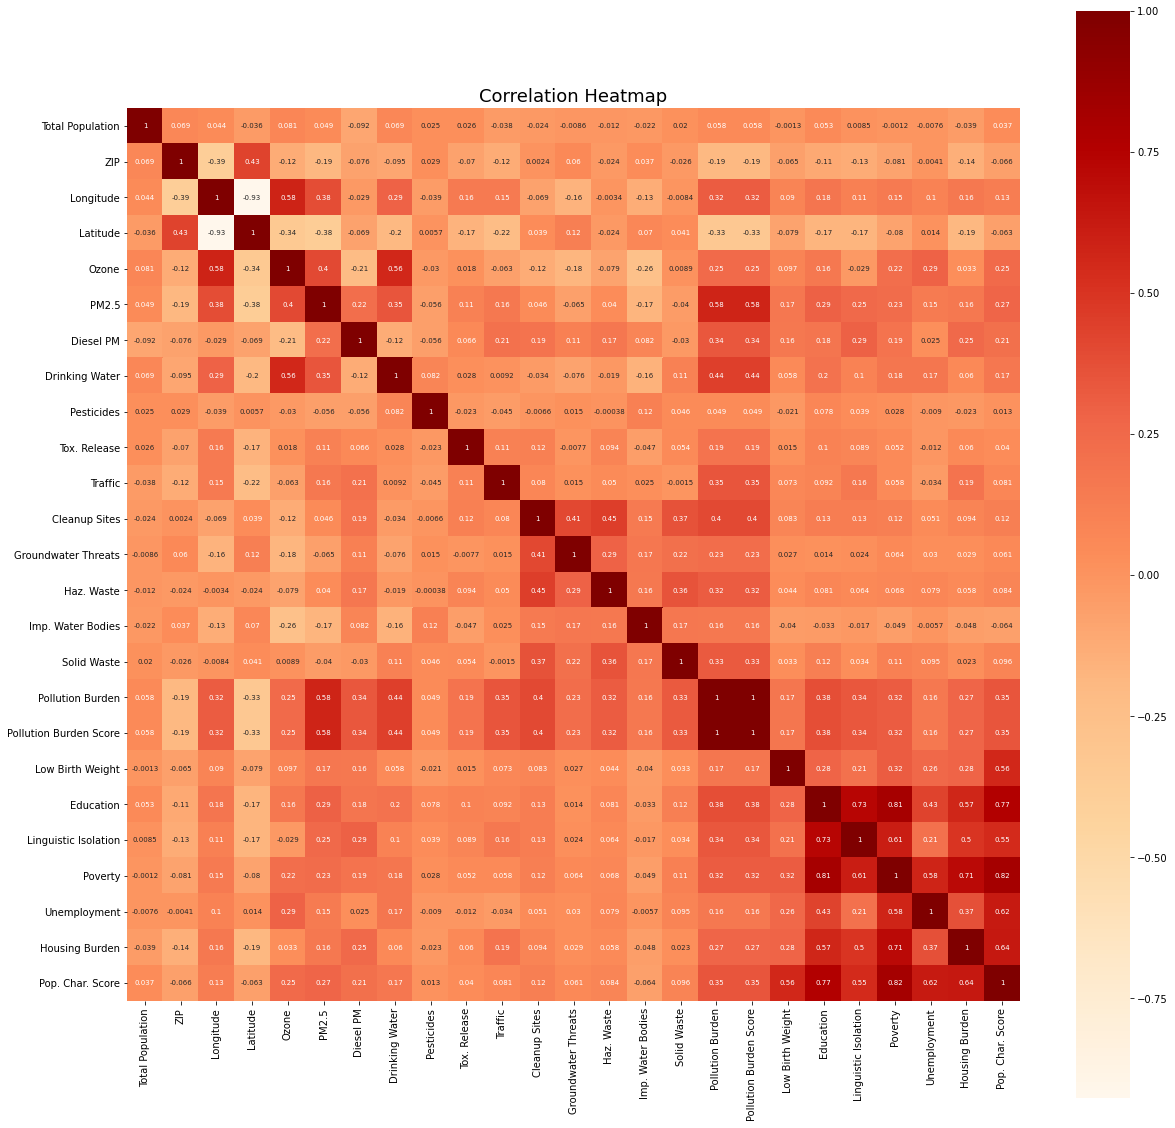

In [13]:
#create correlation heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df3.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

In [14]:
df3.drop(columns = ['Poverty', 'Pollution Burden'], axis = 1, inplace = True)

## Categorical Features

In [15]:
df3.head(2)

,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55
6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07


In [16]:
#create dummy variables
disadvantaged_dummies = pd.get_dummies(df3['SB 535 Disadvantaged Community'], prefix='disadvantaged', drop_first=True)

df3 = pd.concat([df3, disadvantaged_dummies], 
                   axis=1)

In [ ]:
df3.head(2)

## Columns

**TOTAL POPULATION**

In [17]:
df3[df3['Total Population'] == 0]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
df3.drop([6037320000, 6037980001, 6037980002, 6037980005, 6037980006, 6037980007, 6037980020, 6037980025, 
        6037980030, 6071980100, 6081984300], inplace = True)

# #Drinking Water
# df3['Drinking Water']= np.where(df3['Total Population'] == 0, 0, df3['Drinking Water'])

# #Low Birth Weight
# df3['Low Birth Weight']= np.where(df3['Total Population'] == 0, 0, df3['Low Birth Weight'])

# #Education
# df3['Education']= np.where(df3['Total Population'] == 0, 0, df3['Education'])

# #Linguistic Isolation
# df3['Linguistic Isolation']= np.where(df3['Total Population'] == 0, 0, df3['Linguistic Isolation'])

# #Unemployment
# df3['Unemployment']= np.where(df3['Total Population'] == 0, 0, df3['Unemployment'])

# #Housing Burden
# df3['Housing Burden']= np.where(df3['Total Population'] == 0, 0, df3['Housing Burden'])

# #Pop. Char. Score
# df3['Pop. Char. Score']= np.where(df3['Total Population'] == 0, 0, df3['Pop. Char. Score'])

In [19]:
df3[df3['Total Population'] == 0]

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux can not operate on an empty dataframe.
Please check your input again.



,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score,disadvantaged_Yes
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,


**CALIFORNIA COUNTY**

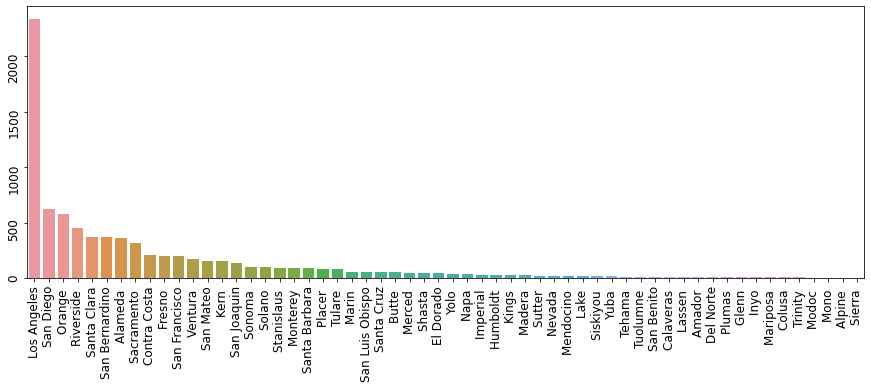

In [20]:
f, axes = plt.subplots(1, figsize=(15,5))
cc = sns.barplot(x=df3['California County'].value_counts().index ,y=df3['California County'].value_counts().values)
cc.tick_params(labelsize=12, rotation = 90)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

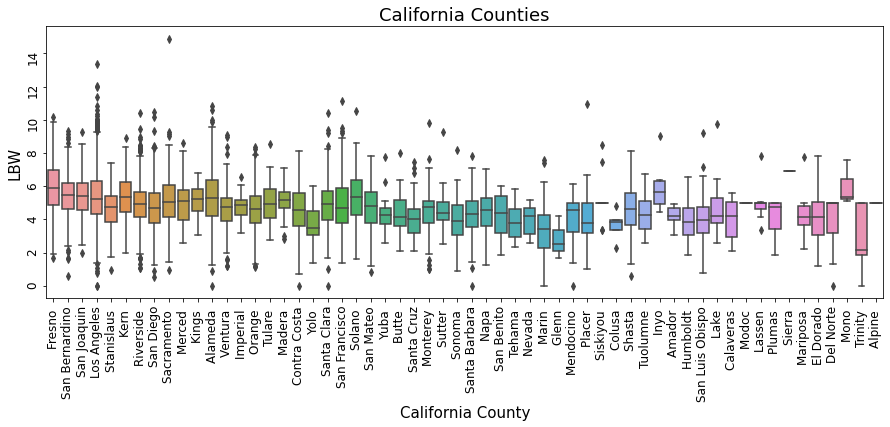

In [21]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.boxplot(x=df3['California County'],y=df3['Low Birth Weight'])
bx.axes.set_title("California Counties",fontsize=18)
bx.set_xlabel("California County",fontsize=15)
bx.set_ylabel("LBW",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

**SB 535 DISADVANTAGED COMMUNITY**

SB 535 requires CalEPA
to identify disadvantaged communities based on
geographic, socioeconomic, public health and
environmental hazard criteria.

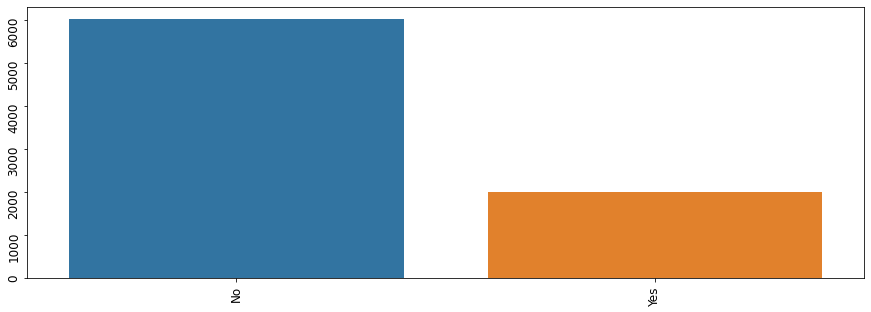

In [22]:
f, axes = plt.subplots(1, figsize=(15,5))
zc = sns.barplot(x=df3['SB 535 Disadvantaged Community'].value_counts().index ,y=df3['SB 535 Disadvantaged Community'].value_counts().values)
zc.tick_params(labelsize=12, rotation = 90)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

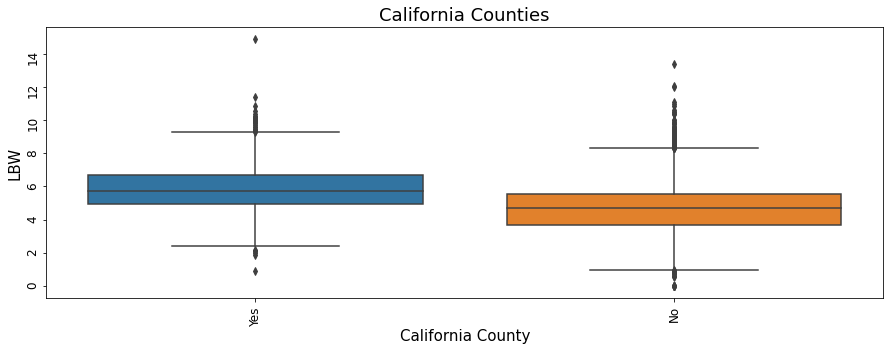

In [23]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.boxplot(x=df3['SB 535 Disadvantaged Community'],y=df3['Low Birth Weight'])
bx.axes.set_title("California Counties",fontsize=18)
bx.set_xlabel("California County",fontsize=15)
bx.set_ylabel("LBW",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

In [24]:
disadvantage_y = df3[df3['SB 535 Disadvantaged Community'] == 'Yes']['Low Birth Weight']
disadvantage_n = df3[df3['SB 535 Disadvantaged Community'] == 'No']['Low Birth Weight']

stats.ttest_ind(disadvantage_y, disadvantage_n)

Ttest_indResult(statistic=31.964300394306264, pvalue=3.917726552667787e-211)

**OZONE**

In [25]:
df3['Ozone'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
ozone_lhalf = df3[df3['Ozone'] <= 0.046000]['Low Birth Weight']
ozone_uhalf = df3[df3['Ozone'] > 0.046000]['Low Birth Weight']

stats.ttest_ind(ozone_lhalf, ozone_uhalf)

Ttest_indResult(statistic=-0.6867864586461339, pvalue=0.4922371559939064)

In [27]:
less_25 = df3[df3['Ozone'] <= 0.040000]['Low Birth Weight'].mean()
less_50 = df3[(df3['Ozone'] > 0.040000) & (df3['Ozone'] <= 0.046000)]['Low Birth Weight'].mean()
less_75 = df3[(df3['Ozone'] > 0.046000) & (df3['Ozone'] <= 0.055000)]['Low Birth Weight'].mean()
less_100 = df3[df3['Ozone'] > 0.055000]['Low Birth Weight'].mean()

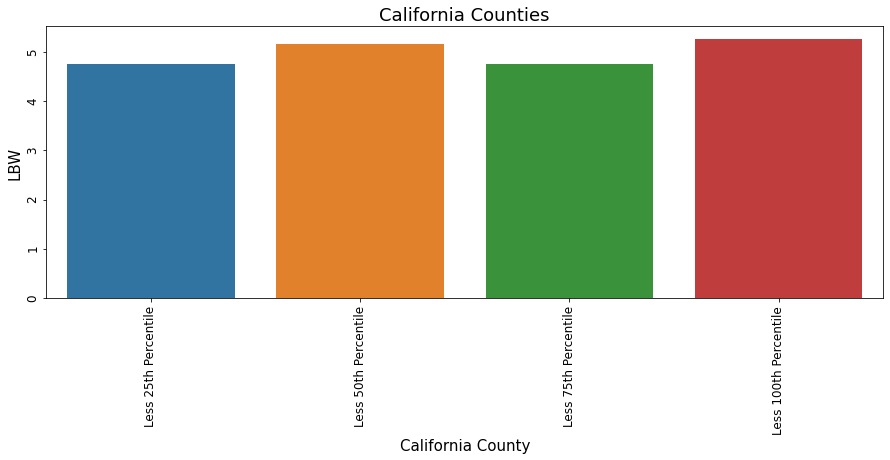

In [28]:
x = ['Less 25th Percentile', 'Less 50th Percentile', 'Less 75th Percentile', 'Less 100th Percentile']
y = [less_25, less_50, less_75, less_100]

#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y)
bx.axes.set_title("California Counties",fontsize=18)
bx.set_xlabel("California County",fontsize=15)
bx.set_ylabel("LBW",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

**PM2.5**

In [29]:
df3['PM2.5'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
pm_lhalf = df3[df3['PM2.5'] <= 10.370000]['Low Birth Weight']
pm_uhalf = df3[df3['PM2.5'] > 10.370000]['Low Birth Weight']

stats.ttest_ind(pm_lhalf, pm_uhalf)

Ttest_indResult(statistic=-15.329330556539206, pvalue=2.672102603540114e-52)

In [31]:
conditions = [(df3['PM2.5'] <= 10.370000),
             (df3['PM2.5'] > 10.370000)]

choice = [('pm_lower'), ('pm_upper')]

df3['pm_halves'] = np.select(conditions, choice)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

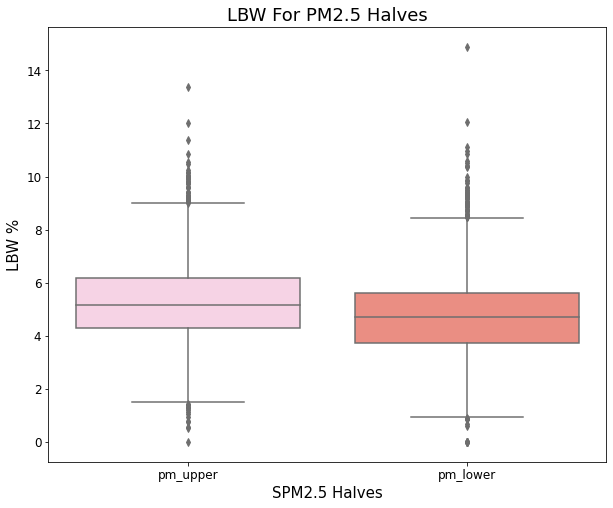

In [32]:
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df3['pm_halves'],y=df3['Low Birth Weight'], palette = 'Set3_r')
bx.axes.set_title("LBW For PM2.5 Halves",fontsize=18)
bx.set_xlabel("SPM2.5 Halves",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

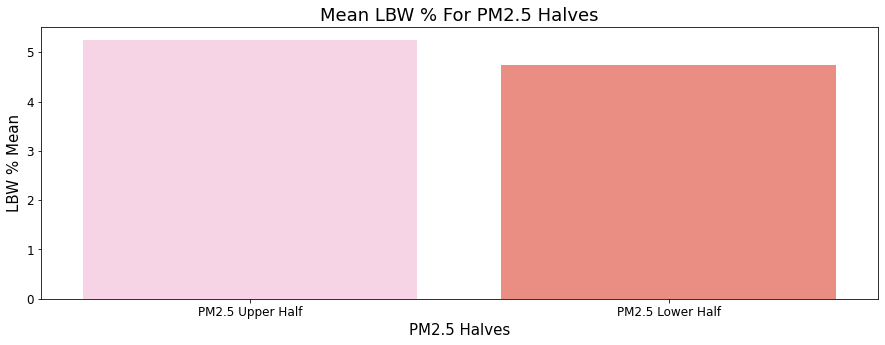

In [33]:
x = ['PM2.5 Upper Half', 'PM2.5 Lower Half']
y = [pm_uhalf.mean(), pm_lhalf.mean()]

#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y, palette = 'Set3_r')
bx.axes.set_title("Mean LBW % For PM2.5 Halves",fontsize=18)
bx.set_xlabel("PM2.5 Halves",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)

**DIESEL PM**

Diesel PM emissions from on-road and non-road sources

In [34]:
df3['Diesel PM'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
diesel_1 = df3[(df3['Diesel PM'] <= 8.812000)]
diesel_2 = df3[(df3['Diesel PM'] > 8.812000) & (df3['Diesel PM'] <= 16.448000)]
diesel_3 = df3[(df3['Diesel PM'] > 6.448000) & (df3['Diesel PM'] <= 24.646500)]
diesel_4 = df3[(df3['Diesel PM'] > 24.646500)]

In [36]:
conditions = [(df3['Diesel PM'] <= 8.812000),
              ((df3['Diesel PM'] > 8.812000) & (df3['Diesel PM'] <= 16.448000)), 
              ((df3['Diesel PM'] > 6.448000) & (df3['Diesel PM'] <= 24.646500)), 
              (df3['Diesel PM'] > 24.646500)]

choice = [('diesel_1'), ('diesel_2'), ('diesel_3'), ('diesel_4')]

df3['diesel_levels'] = np.select(conditions, choice)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

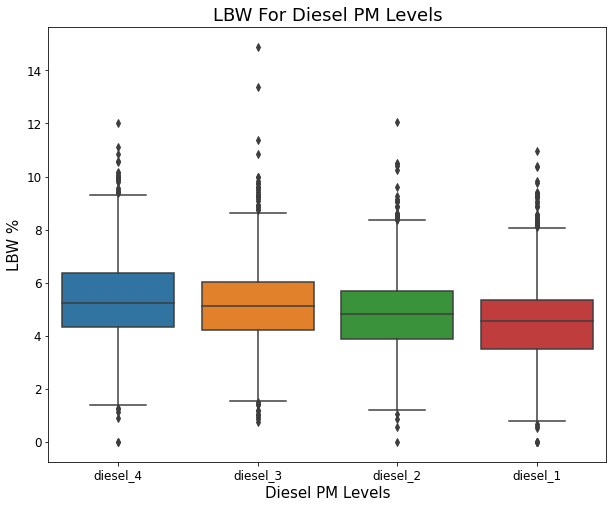

In [37]:
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df3['diesel_levels'],y=df3['Low Birth Weight'])
bx.axes.set_title("LBW For Diesel PM Levels",fontsize=18)
bx.set_xlabel("Diesel PM Levels",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

**POLLUTION BURDEN SCORE**

In [38]:
df3['Pollution Burden Score'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [39]:
conditions = [(df3['Pollution Burden Score'] < 1),
              ((df3['Pollution Burden Score'] >= 1) & (df3['Pollution Burden Score'] < 2)),
              ((df3['Pollution Burden Score'] >= 2) & (df3['Pollution Burden Score'] < 3)),
              ((df3['Pollution Burden Score'] >= 3) & (df3['Pollution Burden Score'] < 4)),
              ((df3['Pollution Burden Score'] >= 4) & (df3['Pollution Burden Score'] < 5)),
              ((df3['Pollution Burden Score'] >= 5) & (df3['Pollution Burden Score'] < 6)),
              ((df3['Pollution Burden Score'] >= 6) & (df3['Pollution Burden Score'] < 7)),
              ((df3['Pollution Burden Score'] >= 7) & (df3['Pollution Burden Score'] < 8)),
              ((df3['Pollution Burden Score'] >= 8) & (df3['Pollution Burden Score'] < 9)),
              ((df3['Pollution Burden Score'] >= 9) & (df3['Pollution Burden Score'] < 10)),
              (df3['Pollution Burden Score'] == 10)]

choice = [(0), (1), (2), (3), (4), (5),
           (6), (7), (8), (9), (10)]

df3['pbs'] = np.select(conditions, choice)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

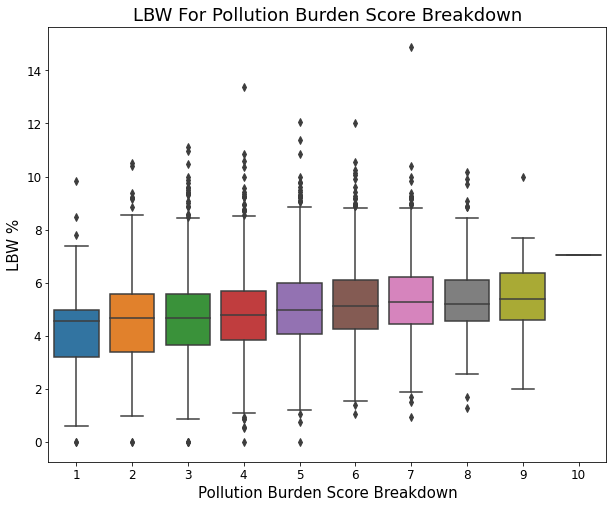

In [40]:
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df3['pbs'],y=df3['Low Birth Weight'])
bx.axes.set_title("LBW For Pollution Burden Score Breakdown",fontsize=18)
bx.set_xlabel("Pollution Burden Score Breakdown",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

In [41]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [(df3[df3['pbs'] == 1]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 2]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 3]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 4]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 5]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 6]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 7]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 8]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 9]['Low Birth Weight'].mean()), 
     (df3[df3['pbs'] == 10]['Low Birth Weight'].mean())]

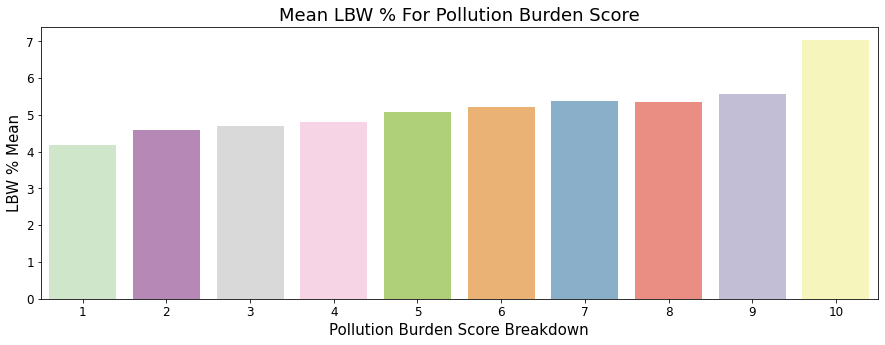

In [42]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y, palette = 'Set3_r')
bx.axes.set_title("Mean LBW % For Pollution Burden Score",fontsize=18)
bx.set_xlabel("Pollution Burden Score Breakdown",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)

In [43]:
#create dummy variables
pm_halves_dummies = pd.get_dummies(df3['pm_halves'], prefix='pm_halves', drop_first=True)
diesel_levels_dummies = pd.get_dummies(df3['diesel_levels'], prefix='diesel_levels', drop_first=True)
pbs_dummies = pd.get_dummies(df3['pbs'], prefix='pbs', drop_first=True)


df3 = pd.concat([df3, pm_halves_dummies, diesel_levels_dummies, pbs_dummies], 
                   axis=1)

In [44]:
df3.head(2)

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score,disadvantaged_Yes,pm_halves,diesel_levels,pbs,pm_halves_pm_upper,diesel_levels_diesel_2,diesel_levels_diesel_3,diesel_levels_diesel_4,pbs_2,pbs_3,pbs_4,pbs_5,pbs_6,pbs_7,pbs_8,pbs_9,pbs_10
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,1,pm_upper,diesel_4,9,1,0,0,1,0,0,0,0,0,0,0,1,0
6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,1,pm_upper,diesel_4,10,1,0,0,1,0,0,0,0,0,0,0,0,1


In [45]:
df3.head(2)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [46]:
df3.drop(columns = ['California County', 'ZIP', 
                    'Nearby City \n(to help approximate location only)', 
                    'Longitude', 'Latitude'], axis = 1, inplace = True)

In [47]:
df3.to_csv('data/df3')